In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
from tensorflow.keras import metrics

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
data = pd.read_csv("../data/synthetic_dataset_v3.csv")

In [6]:
data.head()

,wheel_omega,accel_x,tps,engine_rpm,steering_angle,yaw_rate,tire_temp,front_wheel_speed,TARGET_slip_ratio
0,171.737445,3.264390,0.834541,18891.425360,0.111295,2.007360,79.077197,30.146105,0.159872
1,152.831716,-3.865517,0.270424,16704.664358,0.186691,3.695395,84.695075,30.740272,0.009253
2,8.119878,-2.776515,0.000212,897.459018,0.207611,3.467288,108.818476,24.266252,0.000000
3,158.820583,-1.322066,0.367012,17808.693977,0.151526,3.042599,96.257664,31.423087,0.052900
4,166.556781,1.764431,0.913816,17844.311925,0.021630,0.494939,94.652418,30.927384,0.072408


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data[["wheel_omega", "accel_x", "tps", "engine_rpm", "steering_angle", "yaw_rate", "tire_temp", "front_wheel_speed"]]
y = data[["TARGET_slip_ratio"]]

In [9]:
print(y)

        TARGET_slip_ratio
0                0.159872
1                0.009253
2                0.000000
3                0.052900
4                0.072408
...                   ...
799995           0.199220
799996           0.000000
799997           0.000000
799998           0.100940
799999           0.016629

[800000 rows x 1 columns]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
train_data = X_train.join(y_train)
train_data.head()

,wheel_omega,accel_x,tps,engine_rpm,steering_angle,yaw_rate,tire_temp,front_wheel_speed,TARGET_slip_ratio
632446,187.649034,1.586501,0.678125,20929.786220,-0.081706,-1.605881,93.672148,32.003560,0.218452
475089,188.119821,0.702730,0.698112,20851.276052,0.195645,4.221878,76.663119,31.842572,0.211142
357353,169.936623,2.370162,0.717270,19112.463685,0.101098,2.107294,78.178567,31.561371,0.121218
773087,180.157659,2.173749,0.868811,19921.998112,0.067985,1.333297,77.078450,33.063609,0.115550
74192,180.233016,1.125176,0.747979,19917.936440,0.001493,-0.058594,105.240795,30.509926,0.203203


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_val_scaled = scaler.transform(X_val)
x_test_scaled = scaler.transform(X_test)

In [13]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [14]:
print("const int feature_count = ", len(scaler.mean_))

print("const float scaler_mean[] = {", end="")
print(*scaler.mean_, sep=', ', end="};\n")

print("const float scaler_scale[] = {", end="")
print(*scaler.scale_, sep=', ', end="};\n")

const int feature_count =  8
const float scaler_mean[] = {149.17160932304327, 0.05775319536746983, 0.5909447241434999, 16365.443625614731, 0.0008130710050510943, 0.007380505224844106, 90.58295342344731, 29.863170353731416};
const float scaler_scale[] = {48.73757296060387, 2.2111149234940073, 0.2853366704416937, 5347.724688876903, 0.14164789039994696, 2.8067372336673206, 15.15217868328259, 2.941961058183543};


In [15]:
model = models.Sequential([
    layers.Dense(24, input_shape=(8,)),
    layers.BatchNormalization(),
    layers.Activation('sigmoid'),
    layers.Dense(12),
    layers.BatchNormalization(),
    layers.Activation('sigmoid'),
    layers.Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mae',
    metrics=[metrics.MeanAbsoluteError()]
)

/Users/aayanmapara/miniforge3/envs/ndtc/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-16 15:49:33.123052: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2026-02-16 15:49:33.123143: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-16 15:49:33.123151: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2026-02-16 15:49:33.123193: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-16 15:49:33.123208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc

In [16]:
history = model.fit(x_train_scaled, y_train, validation_data = (x_val_scaled, y_val), epochs=30, batch_size=256)

Epoch 1/30


2026-02-16 15:49:34.981917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - val_loss: 0.0047 - val_mean_absolute_error: 0.0047
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0071 - mean_absolute_error

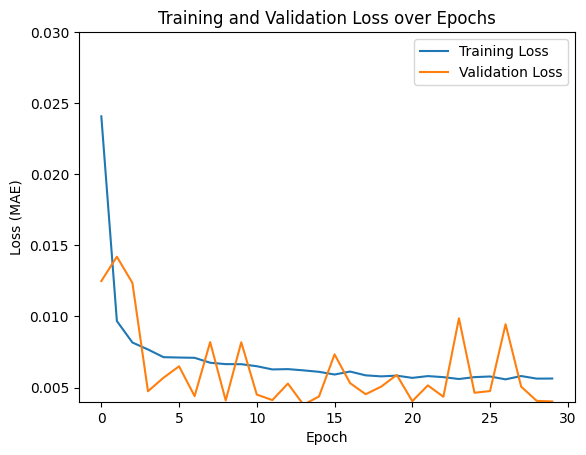

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.ylim(0.004, 0.03)
plt.show()

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,877 (7.34 KB)

 Trainable params: 601 (2.35 KB)

 Non-trainable params: 72 (288.00 B)

 Optimizer params: 1,204 (4.71 KB)

In [20]:
model.evaluate(x_test_scaled, y_test)

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0040


[0.003970939200371504, 0.003970939200371504]

In [21]:
preds = (model.predict(x_test_scaled))

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [22]:
results_df = pd.DataFrame({'Actual Slip Ratio': y_test['TARGET_slip_ratio'], 'Predicted Slip Ratio': preds.flatten()})
display(results_df)

,Actual Slip Ratio,Predicted Slip Ratio
670935,0.092933,0.100853
649589,0.000000,0.004373
2028,0.043780,0.047256
669856,0.057857,0.061263
458897,0.029823,0.036600
...,...,...
545479,0.000000,0.003968
252301,0.229327,0.225473
706417,0.000000,0.003606
518155,0.047410,0.048550


In [23]:
from sklearn.metrics import mean_absolute_error

# permutation test - ensures one feature isn'd dominating
def permutation_test(model, X, y, feature_names=None):
    baseline = model.predict(X, verbose=0).flatten()
    baseline_mae = mean_absolute_error(y, baseline)

    print(f"Baseline MAE: {baseline_mae:.6f}\n")

    for i in range(X.shape[1]):
        X_permuted = X.copy()
        np.random.shuffle(X_permuted[:, i])

        preds = model.predict(X_permuted, verbose=0).flatten()
        mae = mean_absolute_error(y, preds)

        delta = mae - baseline_mae
        name = feature_names[i] if feature_names else f"Feature {i}"
        print(f"{name:20s} | MAE: {mae:.6f} | Δ: {delta:.6f}")


In [24]:
permutation_test(model, x_test_scaled, y_test, ["wheel_omega", "accel_x", "tps", "engine_rpm", "steering_angle", "yaw_rate", "tire_temp", "front_wheel_speed"])

Baseline MAE: 0.003971

wheel_omega          | MAE: 0.032771 | Δ: 0.028800
accel_x              | MAE: 0.022531 | Δ: 0.018560
tps                  | MAE: 0.011532 | Δ: 0.007561
engine_rpm           | MAE: 0.083868 | Δ: 0.079897
steering_angle       | MAE: 0.005158 | Δ: 0.001187
yaw_rate             | MAE: 0.005183 | Δ: 0.001212
tire_temp            | MAE: 0.004311 | Δ: 0.000340
front_wheel_speed    | MAE: 0.072430 | Δ: 0.068459


In [25]:
model.save('slip_model.h5')
print("Model saved to slip_ratio_toy_model.h5")

Model saved to slip_ratio_toy_model.h5


In [26]:
model.save('slip_model.keras')
print("Model saved to slip_ratio_toy_model.keras")

Model saved to slip_ratio_toy_model.keras


In [ ]:
import numpy as np
np.savez("scaler_values.npz", mean=scaler.mean_, scale=scaler.scale_)